# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Jakob Knoblach

Datum: 16.11.2023

Gruppe: 29

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie verhält sich der Koeffizient im Newtonschen Abkühlungsgesetz?

## Versuchsaufbau und Durchführung

Ich habe den Sensor 1 in ein Glas mit warmen Wasser gegeben(rechts), Sensor 2 habe ich daneben gelegt. Anschließend habe ich die Messung gestarten und diese nach neun Minuten beendet.


<img src="figures/IMG_0694 2.jpg" width="800">

## Versuchsauswertung

In [27]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [28]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path_newton = "Versuch_newton/Versuch_newton.h5"

# DONE #

In [29]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
import h5py as h5
import numpy as np
with h5.File(path_newton) as f:
    
    temperature_sensor_2 = f["RawData/1ee7d4bf-3320-694f-bec8-88f2cd5b781a/temperature"]
    timestamp_sensor_2 = f["RawData/1ee7d4bf-3320-694f-bec8-88f2cd5b781a/timestamp"]
    temperature_sensor_1 = f["RawData/1ee7d4c0-eb4f-6204-b90b-7ecfb9fc03f9/temperature"]
    timestamp_sensor_1 = f["RawData/1ee7d4c0-eb4f-6204-b90b-7ecfb9fc03f9/timestamp"]
    
    ts2 = np.array(temperature_sensor_2)
    time2 = np.array(timestamp_sensor_2)
    ts1 = np.array(temperature_sensor_1)
    time1 = np.array(timestamp_sensor_1)
    
# DONE #

[49.125  53.25   54.6875 55.125  55.1875 55.1875 55.0625 54.9375 54.8125
 54.625  54.4375 54.3125 54.125  53.9375 53.75   53.625  53.5    53.3125
 53.125  53.0625 52.875  52.6875 52.5625 52.4375 52.25   52.125  51.9375
 51.8125 51.625  51.5    51.3125 51.1875 51.0625 50.9375 50.75   50.75
 50.4375 50.375  50.25   50.0625 50.0625]


#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

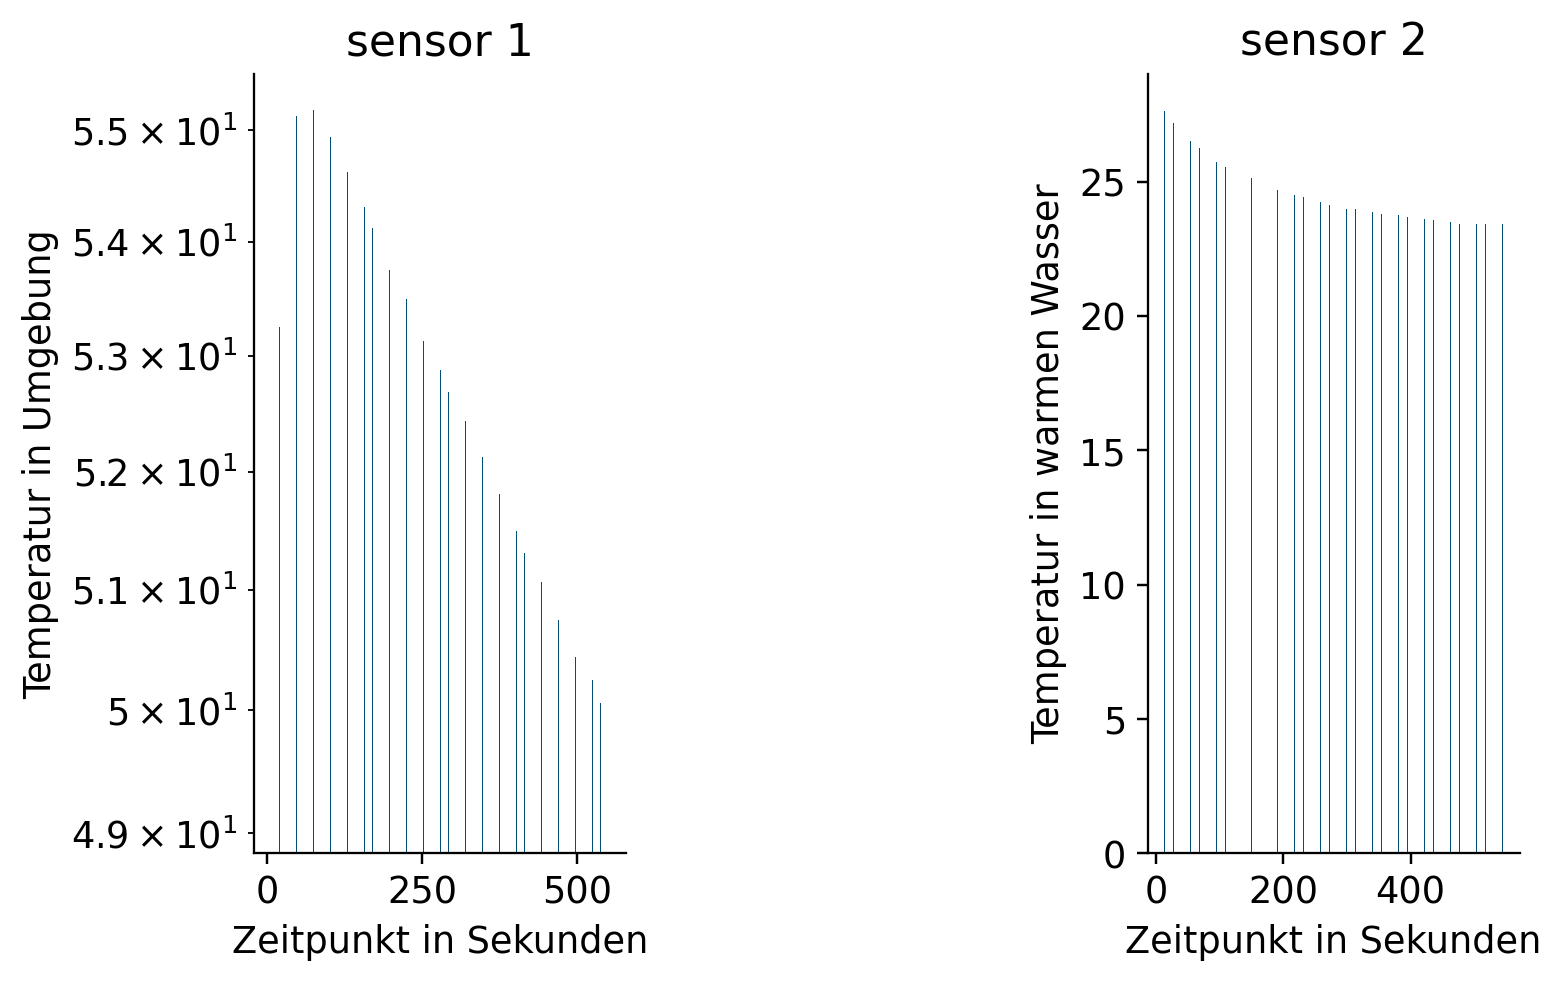

In [47]:
# TODO: Use the temperature and time data for plotting

import matplotlib.pyplot as plt
 
plt.subplot(1,3,1)
plt.bar(time2,ts2)
plt.title("sensor 1")
plt.xlabel("Zeitpunkt in Sekunden")
plt.ylabel("Temperatur in Umgebung")
ax = plt.gca()
ax.set_yscale('log')


plt.subplot(1,3,3)
plt.bar(time1, ts1)
plt.title("sensor 2")
plt.xlabel("Zeitpunkt in Sekunden")
plt.ylabel("Temperatur in warmen Wasser")


plt.subplots_adjust(left = 0.04)

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [45]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
import numpy as np
x = time2
y = ts2

curve = np.polyfit(x, y, 2)
poly = np.poly1d(curve)
verlauf_der_differenz = poly(x)

import numpy as np
from math import e
ln = np.log  # assign the numpy log function to a new function called ln


T1 = 55.185
T2 = 50.0625
temperature_verlauf = verlauf_der_differenz-T2
K = ln(temperature_verlauf/(T1-T2))
# DONE 

<ipython-input-45-96157fc959ba>:18: RuntimeWarning: invalid value encountered in log
  K = ln(temperature_verlauf/(T1-T2))


#### (iV) Ergebnis

In [46]:
# TODO: Print result
print(K)

# DONE #

[-0.27413339 -0.26592382 -0.25972104 -0.25544854 -0.25308037 -0.25261482
 -0.25404421 -0.25738325 -0.26265138 -0.26985447 -0.27907612 -0.2903533
 -0.3037213  -0.3192898  -0.33715856 -0.35744956 -0.38030685 -0.40589904
 -0.43442758 -0.46613301 -0.50130661 -0.54025822 -0.58342932 -0.63130397
 -0.68459203 -0.74387755 -0.81021452 -0.88479538 -0.96923552 -1.06572925
 -1.17729066 -1.30829087 -1.46545431 -1.65965115 -1.91083399 -2.26086171
 -2.82877072 -4.3866252          nan         nan         nan]


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Newtonsche Abkühlungsgesetz besagt, dass der Wärmeverlust eines Körpers direkt proportional zum Temperatur- unterschied zwischen dem Körper und seiner Umgebung ist. Dies kann man anhand meiner Daten bestätigen. Am Anfang steigt die Temperatur aufgrund eines Messfehlers leicht an, so auch K. Dannach sinkt die Temperatur, so auch K. Somit sind Temperatur und K proportional zueinander

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich weis jetzt wie man mit hdf5 Daten arbeitet (und diese verarbeitet). Das Datenformat ist nützlich da man mit diesem die Daten gut verarbeiten kann.